<a href="https://colab.research.google.com/github/SchmetterlingIII/D.T./blob/main/task12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 12
Create a dynamic model of the path of a beam of white light through a triangular prism.

# 12A
- Manually make a triangle that varies with angle alpha ($\alpha$).
- The slider (to be ran in Colab) will adjust the incident angle only (and we're calling it a day)
- Effectively use the stuff from 12B for the points and just work on the visualisation for this task

# 12B
## Extension Opportunities
- Label all asymptotes and derivatives (and allude to their significance in the video that must be made)
- Plot the relationship between the asymptotic changes as alpha changes and see if there is some existing law relating to that.

Refractive index: 1.5183908287640628


/tmp/ipython-input-69-2408525264.py:30: RuntimeWarning: invalid value encountered in arcsin
  theta_4 = np.arcsin((n_glass/n_air) * np.sin(theta_3))
/tmp/ipython-input-69-2408525264.py:66: RuntimeWarning: invalid value encountered in arcsin
  theta_4 = np.arcsin((n_glass/n_air) * np.sin(theta_3))


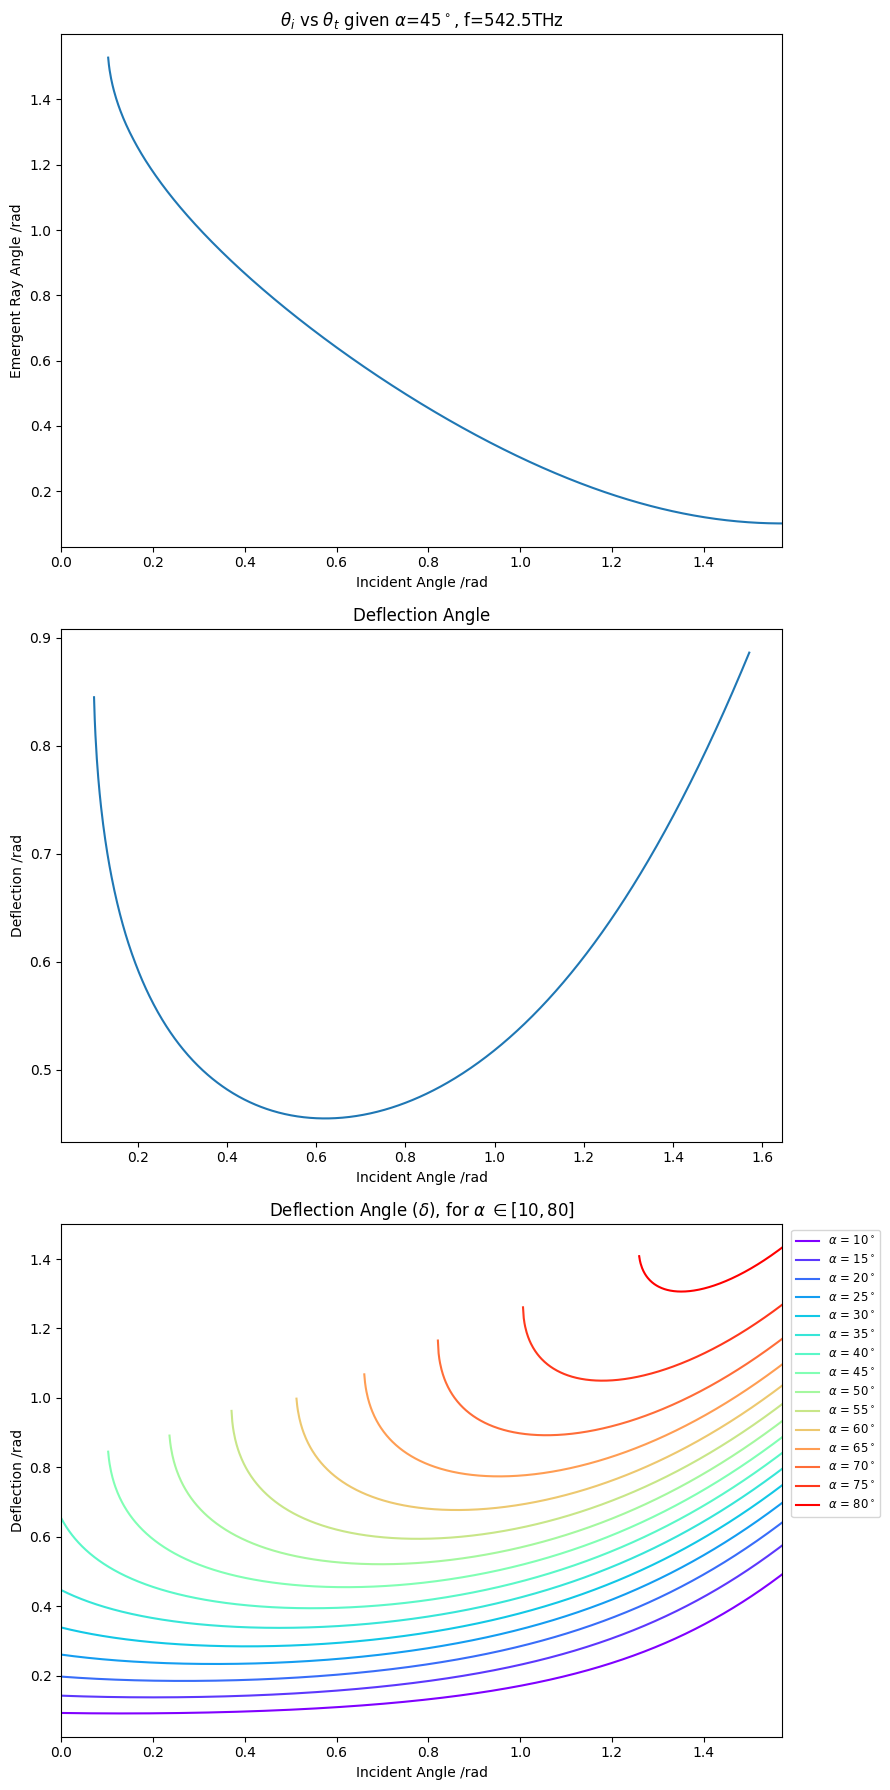

In [69]:
## modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm # colour mapping w/ matplotlib

## constants
n_air = 1
frequency = 542.5 * (10 ** 12)
wavelength = (299792458 / frequency) * 1e6 # converted to nanometres (to work for sellmeier equation)
alpha = 45 # (degrees)
alpha_list = np.arange(10, 85, 5)

## refractive index of crown glass
a = [1.03961212, 0.231792344, 1.01146945]
b = [0.00600069867, 0.0200179144, 103.560653]
summation = []
for i in range(len(a)):
  s = (a[i] * (wavelength ** 2))/((wavelength ** 2) - b[i])
  summation.append(s)
n_glass = np.sqrt(1 + sum(summation))
print(f"Refractive index: {n_glass}")

## equations

### angles
theta_1 = np.radians(np.linspace(0, 90, 1000)) # incident angle
theta_2 = np.arcsin((n_air/n_glass)*np.sin(theta_1)) # refracted angle
theta_3 = np.radians(alpha) - theta_2 # internal incident angle
theta_4 = np.arcsin((n_glass/n_air) * np.sin(theta_3))

### deflection
delta = theta_1 + theta_4 - np.radians(alpha)


## table of results
df = pd.DataFrame({
    'Incident Angle': theta_1,
    'Refracted Angle': theta_2,
    'Internal Incident Angle': theta_3,
    'Emergent Ray Angle': theta_4
})

## plot
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(9,18))
ax1.plot(theta_1, theta_4)
ax1.set_xlabel('Incident Angle /rad')
ax1.set_ylabel('Emergent Ray Angle /rad')
ax1.set_title(r'$\theta_i$ vs $\theta_t$ given $\alpha$=45$^\circ$, f=542.5THz')
ax1.set_xlim(np.radians(0), np.radians(90))

ax2.plot(theta_1, delta)
ax2.set_xlabel('Incident Angle /rad')
ax2.set_ylabel('Deflection /rad')
ax2.set_title("Deflection Angle")

colours = cm.rainbow(np.linspace(0, 1, len(alpha_list)))

# some super inefficient stuff
for i in range(len(alpha_list)):
  alpha = alpha_list[i]
  ### angles
  theta_1 = np.radians(np.linspace(0, 90, 1000)) # incident angle
  theta_2 = np.arcsin((n_air/n_glass)*np.sin(theta_1)) # refracted angle
  theta_3 = np.radians(alpha) - theta_2 # internal incident angle
  theta_4 = np.arcsin((n_glass/n_air) * np.sin(theta_3))

  ### deflection
  delta = theta_1 + theta_4 - np.radians(alpha)

  ax3.plot(theta_1, delta, label = rf"$\alpha$ = {alpha}$^\circ$", color = colours[i])


ax3.set_xlabel('Incident Angle /rad')
ax3.set_ylabel('Deflection /rad')
ax3.set_title(r"Deflection Angle ($\delta$), for $\alpha$ $\in [10,80]$")
ax3.set_xlim(np.radians(0), np.radians(90))
ax3.legend(bbox_to_anchor=(1.005, 1), loc = 'upper left', fontsize = 'small', fancybox = True)

plt.tight_layout()
plt.show()

## print
